In [2]:
# import module
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# set file path
DATA_PATH = './Data/playground-series-s4e10/'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

In [4]:
# read data
train_df = pd.read_csv(DATA_PATH + TRAIN_DATA)

print(f"train data : \n{train_df.head()}\n\n")

test_df = pd.read_csv(DATA_PATH + TEST_DATA)

print(f"test data : \n{test_df.head()}")

train data : 
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0

In [5]:
# check data's info
print(train_df.info())
print('\n\n')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  int64  
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.6+ MB
None


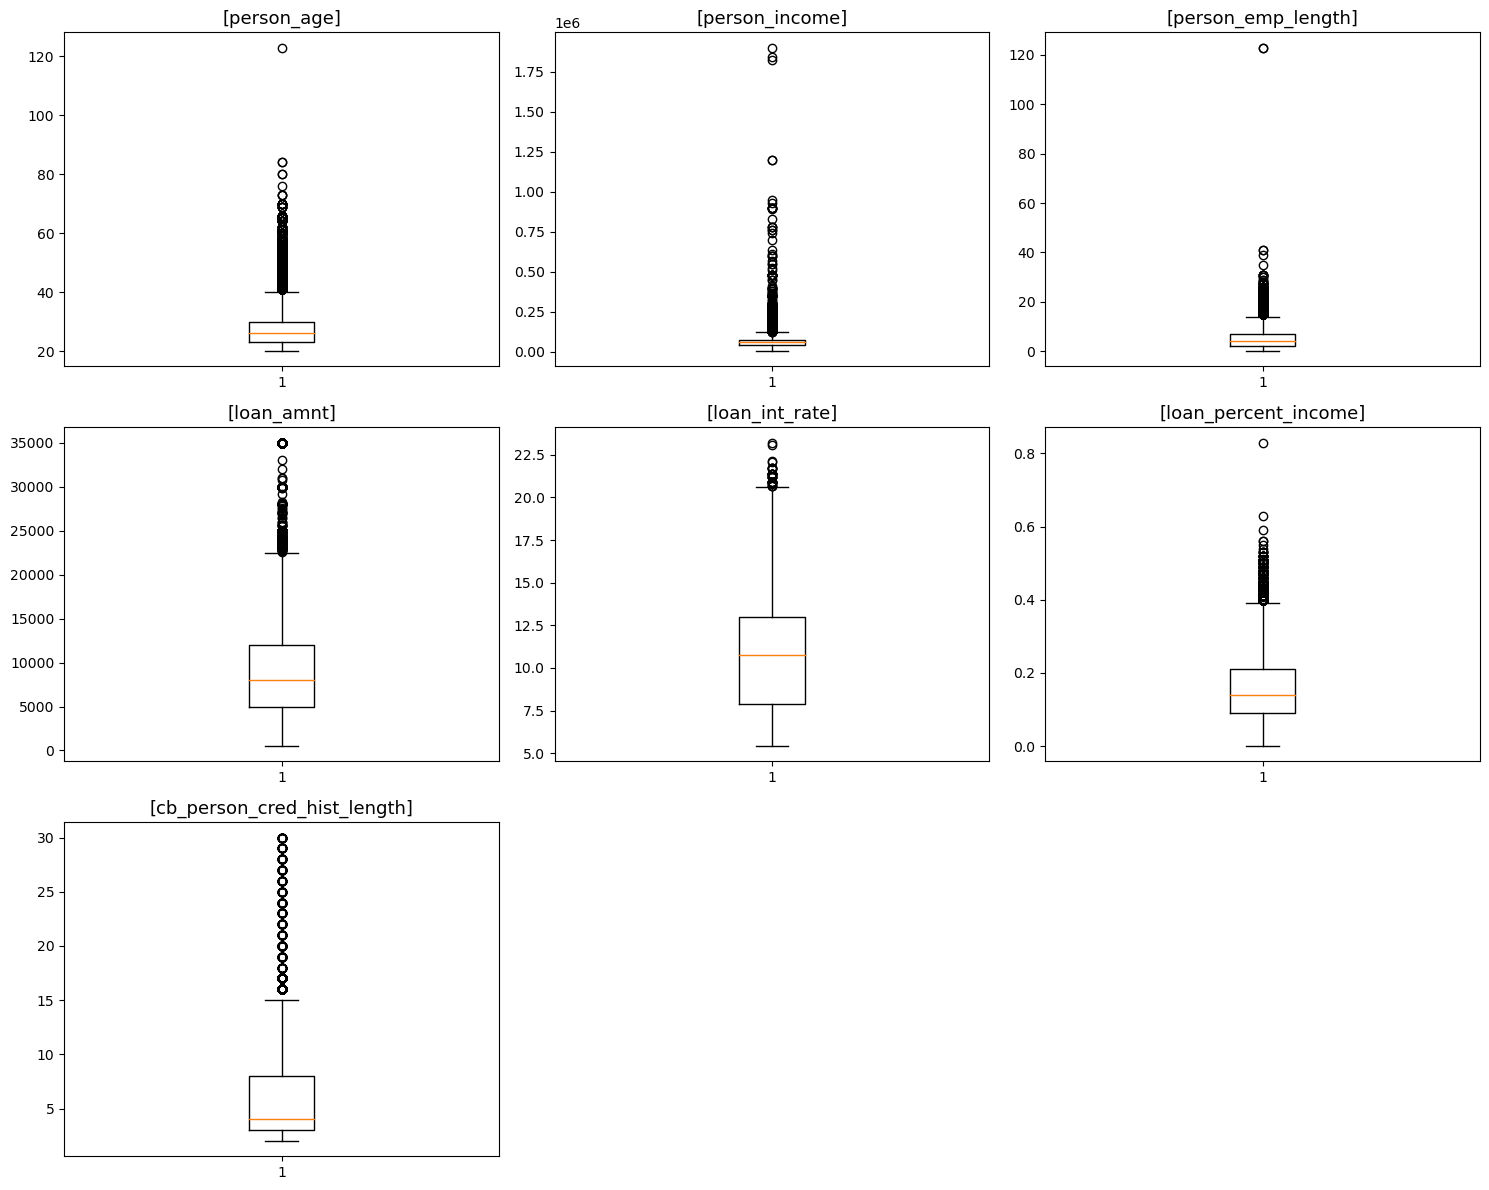

In [6]:
# check outlier (numeric column)

numeric_df = train_df.iloc[:, [1, 2, 4, 7, 8, 9, 11]]

plt.figure(figsize = (15, 12))

col = 3
row = math.ceil(len(numeric_df.columns) / 3) 

for i in range(len(numeric_df.columns)):
    plt.subplot(row, col, i + 1)
    plt.title(f'[{numeric_df.columns[i]}]', fontsize = 13)
    plt.boxplot(numeric_df.iloc[:, i])

plt.tight_layout()
plt.show()

In [7]:
def detect_outlier(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [8]:
age_outlier = detect_outlier(train_df['person_age'])
income_outlier = detect_outlier(train_df['person_income'])
emp_length_outlier = detect_outlier(train_df['person_emp_length'])

In [9]:
sorted(age_outlier, reverse = True)

[123,
 84,
 84,
 80,
 80,
 76,
 73,
 73,
 73,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 69,
 69,
 69,
 69,
 69,
 69,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,

In [10]:
sorted(income_outlier, reverse = True)

[1900000,
 1839784,
 1824000,
 1200000,
 1200000,
 948000,
 928000,
 900000,
 900000,
 900000,
 900000,
 900000,
 889000,
 828000,
 780000,
 780000,
 780000,
 762000,
 762000,
 741600,
 700000,
 636000,
 612000,
 600000,
 600000,
 600000,
 564000,
 550000,
 550000,
 522000,
 510000,
 480000,
 480000,
 480000,
 480000,
 480000,
 480000,
 480000,
 480000,
 468000,
 450000,
 450000,
 410000,
 400000,
 397800,
 397800,
 397800,
 390000,
 390000,
 382000,
 381450,
 370000,
 365000,
 360000,
 360000,
 351699,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 350000,
 336000,
 325000,
 320000,
 305000,
 305000,
 304800,
 300000,
 300000,
 300000,
 300000,
 300000,
 300000,
 300000,
 300000,
 300000,
 300000,
 294000,
 290000,
 290000,
 290000,
 287300,
 287300,
 285000,
 280000,
 280000,
 280000,
 280000,
 275000,
 275000,
 275000,
 275000,
 275000,
 275000,
 275000,
 270000,
 267000,
 267000,
 266000,
 263004,
 260000,
 260000,
 260000,
 2590

In [11]:
sorted(emp_length_outlier, reverse = True)


[123.0,
 123.0,
 41.0,
 41.0,
 39.0,
 35.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 30.0,
 30.0,
 29.0,
 29.0,
 28.0,
 28.0,
 28.0,
 28.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.

In [12]:
drop_list = list(train_df[train_df['person_age'] >= 123]['id'].values)
drop_list.extend(train_df[train_df['person_income'] >= 1824000]['id'].values)
drop_list.extend(train_df[train_df['person_emp_length'] >= 123]['id'].values)

drop_list

[47336, 12404, 17387, 37591, 41079, 49252]

In [13]:
# drop outlier
train_df.drop(index = drop_list, axis = 0, inplace = True)

In [14]:
# check duplicate
train_df.duplicated().sum()

0

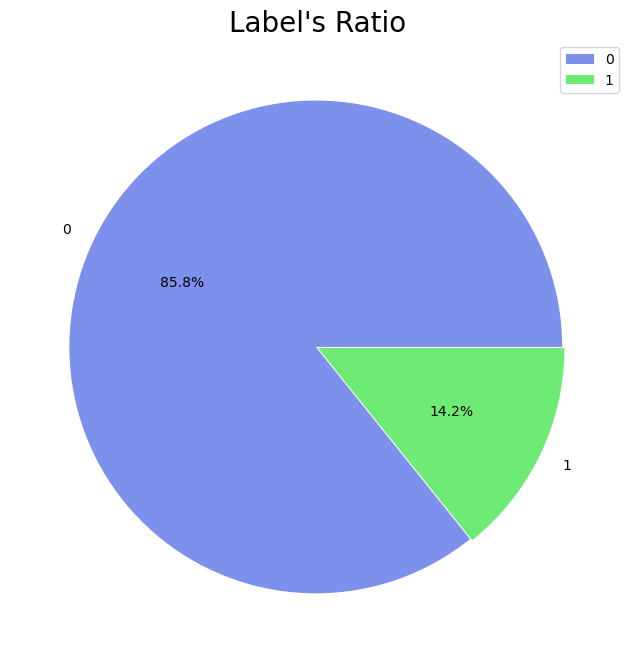

In [42]:
plt.figure(figsize = (12, 8))

plt.pie(train_df['loan_status'].value_counts().values, 
        labels = train_df['loan_status'].value_counts().index,
        autopct = '%1.1f%%',
        explode = [0.01, 0],
        colors = ['#7D90EB', '#6EEB74']
)
plt.title("Label's Ratio", size = 20)
plt.legend()
plt.show()

In [27]:
features = train_df.iloc[:, 1:-1]
target = train_df.iloc[:, [-1]]

In [ ]:
# split validation data

X_train, X_val, y_train, y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.2,
                                                  stratify = target,
                                                  random_state = 42)